In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# allow plots to appear directly in the notebook
%matplotlib inline
data= pd.read_csv('/content/gender_classification_v7.xlsx - gender_classification_v7.csv')

In [2]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
data.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

We can see that our data is clean from Nulls, Later we will also replace the "gender" column to numeric data, Then we can work with numeric data only.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
data.shape

(5001, 8)

In [6]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())

[1 0]
[11.8 14.  14.4 13.5 13.  15.3 11.9 12.1 12.5 15.5 14.7 14.5 14.2 15.2
 14.6 12.8 12.9 12.2 12.3 12.7 14.1 11.5 13.8 13.7 12.  11.4 15.4 13.3
 13.2 14.3 13.9 11.7 15.1 15.  12.4 11.6 12.6 14.8 13.1 13.4 13.6 14.9]
[6.1 5.4 6.3 5.9 6.8 6.2 5.2 5.8 6.7 6.5 6.  5.6 7.  6.4 5.3 5.7 5.1 5.5
 7.1 6.6 6.9]
[1 0]
[0 1]
[1 0]
[1 0]
['Male' 'Female']


In [7]:
for i in range(data.shape[1]):  
     print(data.iloc[:,i].value_counts())

1    4349
0     652
Name: long_hair, dtype: int64
12.0    168
11.8    161
14.1    155
14.0    154
11.5    154
11.6    152
11.9    150
13.3    149
14.2    149
12.2    145
12.6    145
12.1    145
13.2    143
14.3    143
12.9    141
12.5    141
13.7    140
12.8    138
12.3    138
13.6    138
13.0    137
13.4    137
13.5    136
13.8    134
11.7    133
13.1    131
13.9    131
12.7    130
12.4    127
11.4     84
14.9     79
14.5     72
15.2     71
15.5     66
15.1     65
15.4     64
15.3     64
14.4     63
14.6     61
15.0     60
14.7     59
14.8     48
Name: forehead_width_cm, dtype: int64
5.7    306
5.9    303
5.3    301
5.5    299
6.1    296
5.1    293
6.2    290
5.8    290
6.4    287
6.3    285
6.5    285
5.6    279
6.0    275
5.4    265
5.2    259
6.6    126
6.8    118
7.0    117
7.1    113
6.9    109
6.7    105
Name: forehead_height_cm, dtype: int64
0    2531
1    2470
Name: nose_wide, dtype: int64
1    2540
0    2461
Name: nose_long, dtype: int64
0    2535
1    2466
Name: lips_thin, d

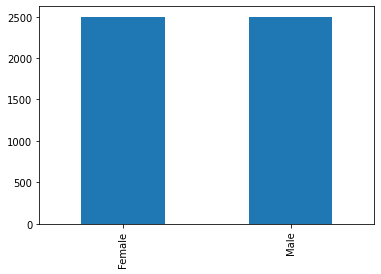

In [8]:
data['gender'].value_counts().plot(kind='bar')

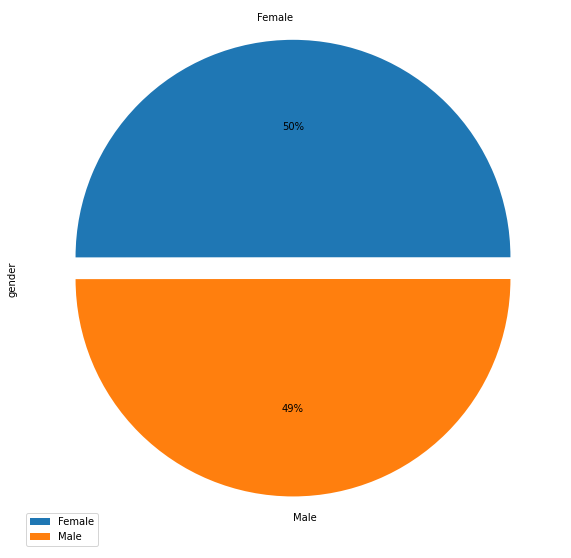

In [9]:
plt.figure(figsize=(10,10))
explode=[0.1,0]
data['gender'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.show()

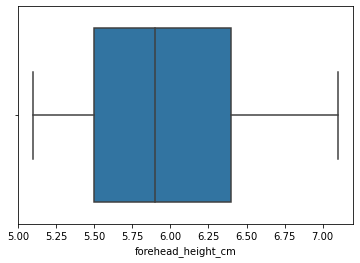

In [10]:
sns.boxplot(x=data["forehead_height_cm"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


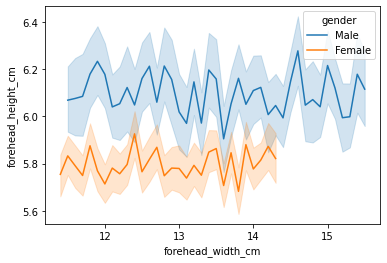

In [11]:
sns.lineplot(data['forehead_width_cm'],data['forehead_height_cm'], hue=data["gender"])

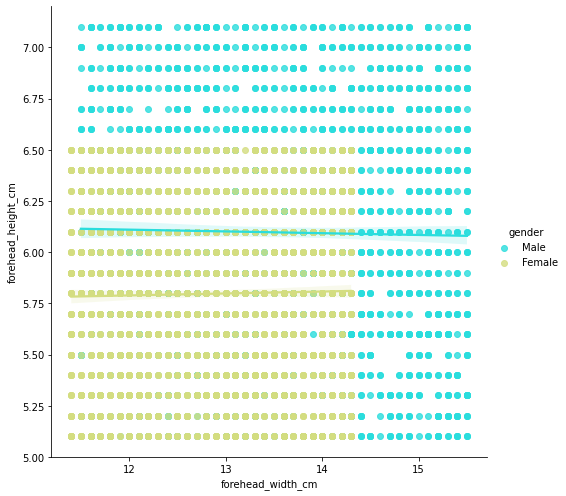

In [12]:
sns.lmplot(x="forehead_width_cm", y="forehead_height_cm", hue="gender", data=data, palette = 'rainbow', height = 7)



This graph describe the longer and wider the forehead, the more likely it is a man

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


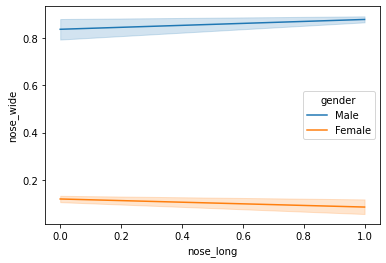

In [13]:
sns.lineplot(data['nose_long'],data['nose_wide'], hue=data["gender"])

Here also the division is really equal - men have longer and wider nose then women.

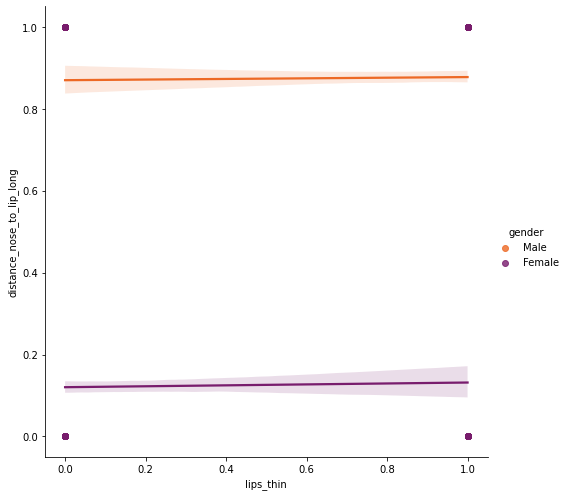

In [14]:
sns.lmplot(x="lips_thin", y="distance_nose_to_lip_long", hue="gender", data=data, palette = 'inferno_r', height = 7)



We can conclude from the graph above that the division is really equal - men have thinner lips and a greater distance from the lip to the chin.

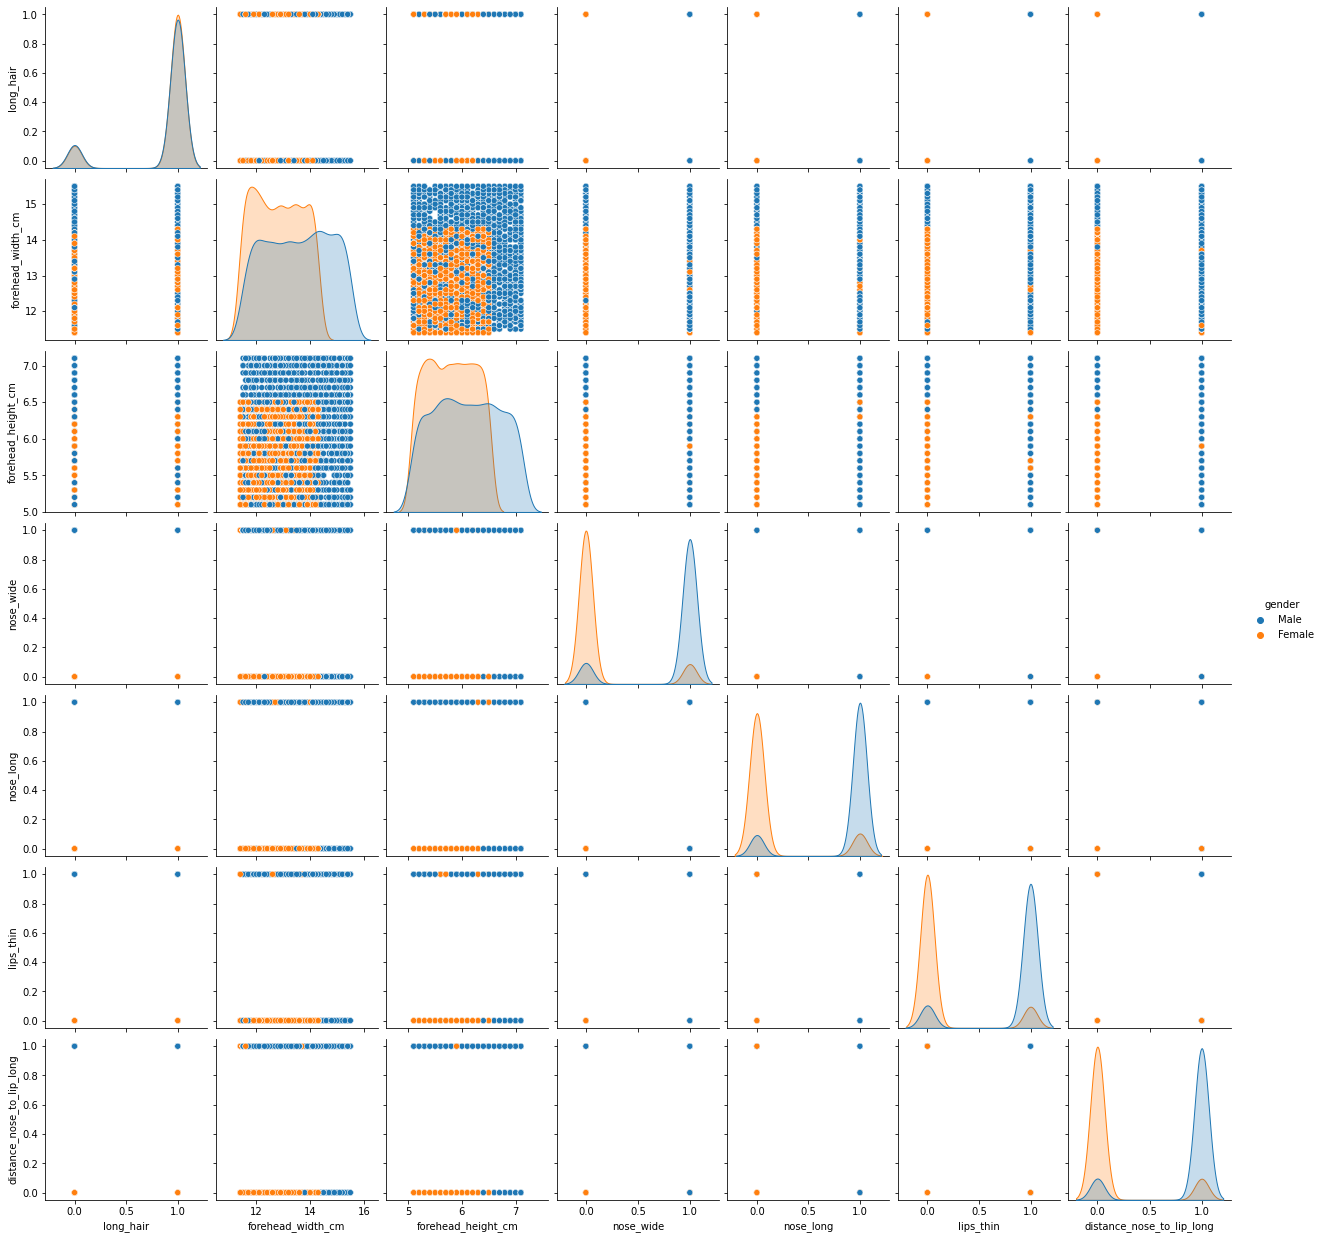

In [15]:
sns.pairplot(data,hue='gender')

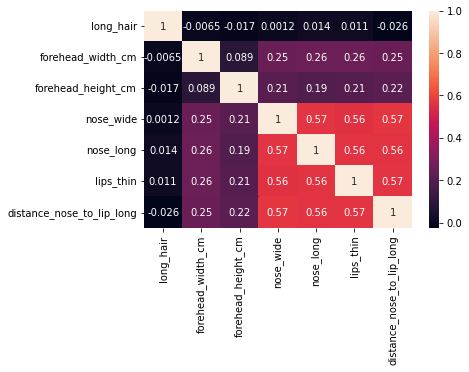

In [16]:
sns.heatmap(data.corr(),annot=True)

We can also visualize the correlation with our target variable in a sorted and clearer way.

In [19]:
twogender = {'Female':0, 'Male':1}
data['gender'] = data['gender'].map(twogender)

In [20]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


model fitting


In [21]:
X = data.drop('gender', axis=1)
y = data['gender']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 7)
(1501, 7)
(3500,)
(1501,)


In [24]:
from sklearn.linear_model import LogisticRegression
lgst = LogisticRegression(C=1e9)
lgst_model = lgst.fit(X_train,y_train)

In [25]:
lgst_pred = lgst.predict(X_test)
lgst_acc = accuracy_score(y_test,lgst_pred)

In [26]:
print("Accuracy of Logistic Regression: {:.2f}%".format(lgst_acc*100))

Accuracy of Logistic Regression: 96.87%


In [27]:
def get_test_result(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test,test_pred))

In [28]:
test_result=get_test_result(lgst_model)
print(test_result)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       748
           1       0.97      0.96      0.97       753

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

